In [1]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

%pylab inline
%matplotlib inline

# sets backend to render higher res images
%config InlineBackend.figure_formats = ['retina']

import pandas as pd
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.datasets import fetch_openml
from sklearn.utils import shuffle
from sklearn.cluster import DBSCAN, SpectralClustering, MeanShift
from sklearn.preprocessing import StandardScaler

import json
import inspect

import gensim.downloader as api

from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors, Word2Vec
from gensim.scripts.glove2word2vec import glove2word2vec





Populating the interactive namespace from numpy and matplotlib


2022-03-10 16:29:31,876 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2022-03-10 16:29:31,876 : INFO : built Dictionary(12 unique tokens: ['computer', 'human', 'interface', 'response', 'survey']...) from 9 documents (total 29 corpus positions)
2022-03-10 16:29:31,877 : INFO : Dictionary lifecycle event {'msg': "built Dictionary(12 unique tokens: ['computer', 'human', 'interface', 'response', 'survey']...) from 9 documents (total 29 corpus positions)", 'datetime': '2022-03-10T16:29:31.877226', 'gensim': '4.0.1', 'python': '3.9.9 | packaged by conda-forge | (main, Dec 20 2021, 02:41:37) \n[Clang 11.1.0 ]', 'platform': 'macOS-12.2.1-x86_64-i386-64bit', 'event': 'created'}


In [2]:
model_wikipedia200 = api.load("glove-wiki-gigaword-200")

2022-03-10 16:29:35,227 : INFO : loading projection weights from /Users/kate/gensim-data/glove-wiki-gigaword-200/glove-wiki-gigaword-200.gz
2022-03-10 16:30:10,931 : INFO : KeyedVectors lifecycle event {'msg': 'loaded (400000, 200) matrix of type float32 from /Users/kate/gensim-data/glove-wiki-gigaword-200/glove-wiki-gigaword-200.gz', 'binary': False, 'encoding': 'utf8', 'datetime': '2022-03-10T16:30:10.931118', 'gensim': '4.0.1', 'python': '3.9.9 | packaged by conda-forge | (main, Dec 20 2021, 02:41:37) \n[Clang 11.1.0 ]', 'platform': 'macOS-12.2.1-x86_64-i386-64bit', 'event': 'load_word2vec_format'}


In [3]:
model_twitter200 = api.load("glove-twitter-200")

2022-03-10 16:30:11,161 : INFO : loading projection weights from /Users/kate/gensim-data/glove-twitter-200/glove-twitter-200.gz
2022-03-10 16:31:59,376 : INFO : KeyedVectors lifecycle event {'msg': 'loaded (1193514, 200) matrix of type float32 from /Users/kate/gensim-data/glove-twitter-200/glove-twitter-200.gz', 'binary': False, 'encoding': 'utf8', 'datetime': '2022-03-10T16:31:59.372862', 'gensim': '4.0.1', 'python': '3.9.9 | packaged by conda-forge | (main, Dec 20 2021, 02:41:37) \n[Clang 11.1.0 ]', 'platform': 'macOS-12.2.1-x86_64-i386-64bit', 'event': 'load_word2vec_format'}


In [4]:
plt.rcParams['figure.figsize'] = [6,6]
sns.set_style("whitegrid")
sns.set_context("talk")

In [5]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=10):
    color = 'brgcmyk'
    alpha = 0.5
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

In [6]:
X = model_wikipedia200.vectors

In [308]:
X

array([[-2.50328585, -3.1382643 ],
       [-2.35231146, -1.47697014],
       [-3.23415337, -3.23413696],
       ...,
       [ 6.35144821,  7.07015024],
       [ 5.97347874,  5.11812535],
       [ 5.83693304,  5.25509736]])

IndexError: string index out of range

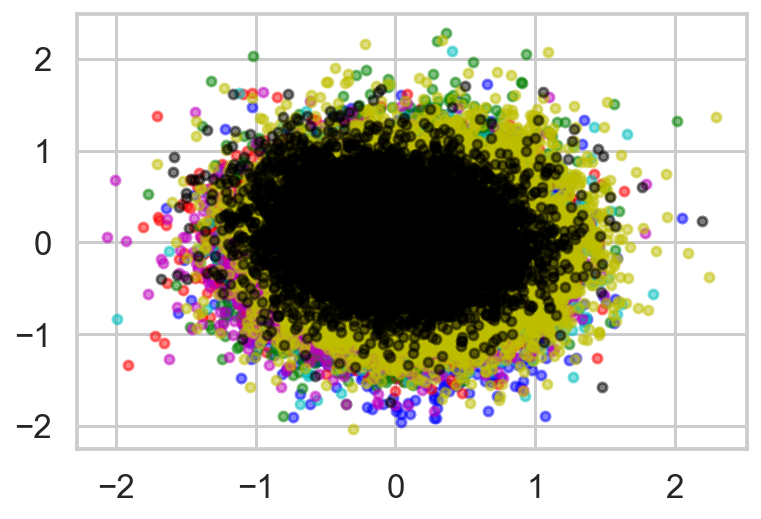

In [389]:
num_clusters = 10
km = KMeans(n_clusters=num_clusters,random_state=10,n_init=1) # n_init, number of times the K-mean algorithm will run
km.fit(X)
display_cluster(X,km,num_clusters)

In [390]:
km.inertia_

9949642.0

100%|███████████████████████████████████████████| 29/29 [45:33<00:00, 94.24s/it]


ValueError: x and y must have same first dimension, but have shapes (98,) and (29,)

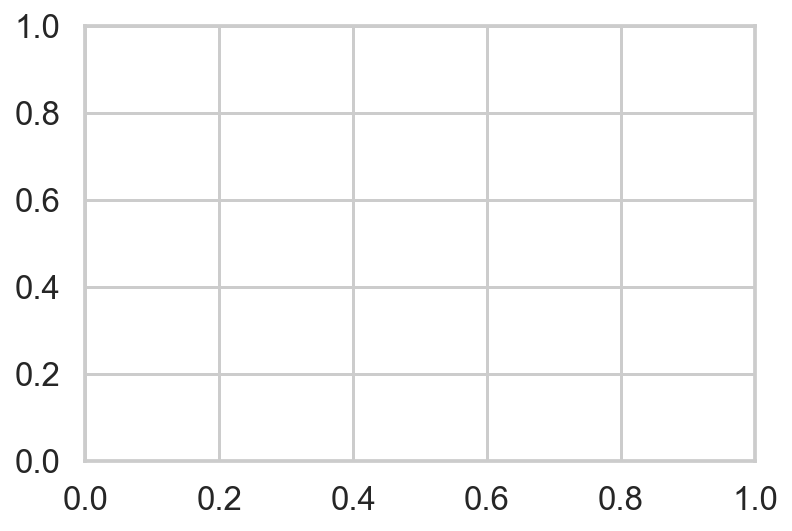

In [397]:
inertia = []
for n_clusters in tqdm(range(2,60,2)):
    km = KMeans(n_clusters=n_clusters)
    km.fit(X)
    inertia.append(km.inertia_)
    

In [401]:
inertia

[10466199.0,
 10251350.0,
 10103319.0,
 10014864.0,
 9941200.0,
 9885326.0,
 9835572.0,
 9791356.0,
 9753714.0,
 9719550.0,
 9686028.0,
 9655883.0,
 9627194.0,
 9599631.0,
 9574914.0,
 9553956.0,
 9535778.0,
 9511298.0,
 9491299.0,
 9471709.0,
 9461264.0,
 9437786.0,
 9417676.0,
 9402532.0,
 9389010.0,
 9371956.0,
 9356150.0,
 9342174.0,
 9325368.0]

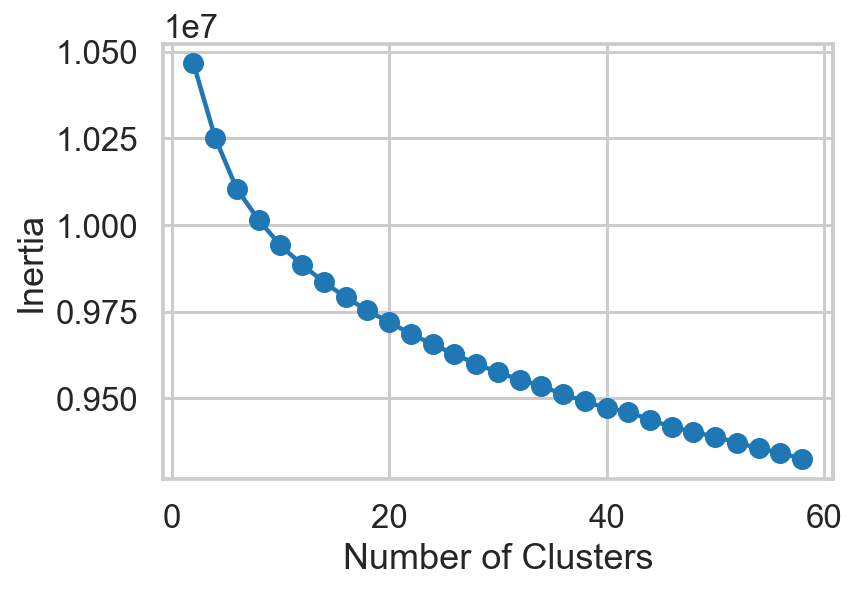

In [398]:
plt.plot(range(2,60,2),    inertia)
plt.scatter(range(2,60,2), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');

IndexError: string index out of range

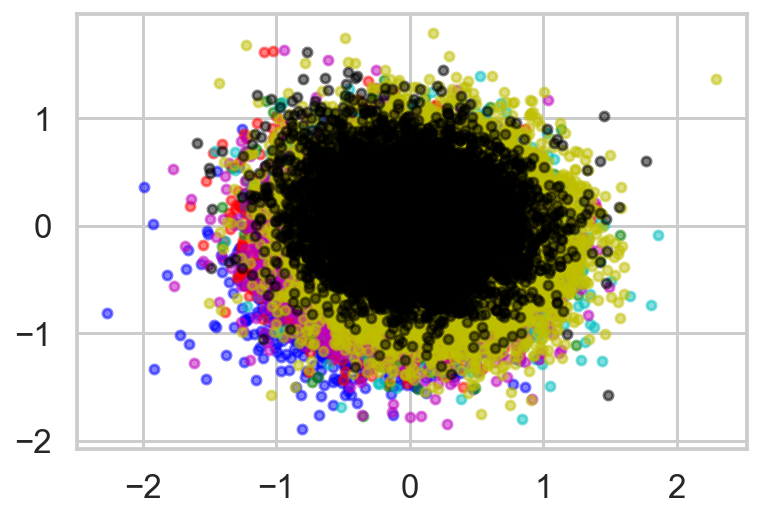

In [406]:
num_clusters = 20
km = KMeans(n_clusters=num_clusters,random_state=10,n_init=1) # n_init, number of times the K-mean algorithm will run
km.fit(X)
display_cluster(X, km, 20)

In [54]:
vectors = model_wikipedia200.vectors
vectors.shape

(400000, 200)

In [7]:
from tqdm import tqdm

In [8]:
words = []
for i in tqdm(range(400000)):
    words.append(model_wikipedia200.index_to_key[i])
words

100%|██████████████████████████████| 400000/400000 [00:00<00:00, 2734128.83it/s]


['the',
 ',',
 '.',
 'of',
 'to',
 'and',
 'in',
 'a',
 '"',
 "'s",
 'for',
 '-',
 'that',
 'on',
 'is',
 'was',
 'said',
 'with',
 'he',
 'as',
 'it',
 'by',
 'at',
 '(',
 ')',
 'from',
 'his',
 "''",
 '``',
 'an',
 'be',
 'has',
 'are',
 'have',
 'but',
 'were',
 'not',
 'this',
 'who',
 'they',
 'had',
 'i',
 'which',
 'will',
 'their',
 ':',
 'or',
 'its',
 'one',
 'after',
 'new',
 'been',
 'also',
 'we',
 'would',
 'two',
 'more',
 "'",
 'first',
 'about',
 'up',
 'when',
 'year',
 'there',
 'all',
 '--',
 'out',
 'she',
 'other',
 'people',
 "n't",
 'her',
 'percent',
 'than',
 'over',
 'into',
 'last',
 'some',
 'government',
 'time',
 '$',
 'you',
 'years',
 'if',
 'no',
 'world',
 'can',
 'three',
 'do',
 ';',
 'president',
 'only',
 'state',
 'million',
 'could',
 'us',
 'most',
 '_',
 'against',
 'u.s.',
 'so',
 'them',
 'what',
 'him',
 'united',
 'during',
 'before',
 'may',
 'since',
 'many',
 'while',
 'where',
 'states',
 'because',
 'now',
 'city',
 'made',
 'like',
 

In [25]:
with open('wikipedia_words.txt', 'w') as f:
    for item in words:
        f.write("%s\n" % item)

In [378]:
len(model_wikipedia200.vectors)

400000

In [9]:
# Cluster each vectorized document 
kmeans = KMeans(n_clusters=10)
kmeans.fit(model_wikipedia200.vectors);


In [10]:
df = pd.DataFrame({
    "text": ["".join(text) for text in words],
    "cluster": kmeans.labels_
})
df

text  cluster
0              the        7
1                ,        7
2                .        7
3               of        7
4               to        7
...            ...      ...
399995      chanty        9
399996      kronik        4
399997     rolonda        9
399998     zsombor        6
399999  sandberger        4

[400000 rows x 2 columns]

In [11]:
wiki_clusters = df.groupby('cluster')['text'].apply(list).to_dict()
wiki_clusters

{0: ['notoc',
  'resend',
  'fwd',
  '10-member',
  'mainichi',
  '12-member',
  'baitullah',
  'clausura',
  'sukhoi',
  'onlytest',
  'mujahedin',
  'sbg',
  '10-game',
  'pmi',
  'crtc',
  'outrebounded',
  'afptv',
  '30-company',
  '1975-90',
  'eighteens',
  '16-member',
  'afp03',
  '27-member',
  'daybook',
  'saf',
  'f-35',
  '50-percent',
  '35-nation',
  'oberliga',
  'jamiat',
  'benesova',
  'regionalliga',
  '14-member',
  '10-percent',
  'hizbul',
  '2-point',
  'reductase',
  'whl',
  'single-season',
  'khl',
  '21-member',
  'kenteris',
  'jamaa',
  'retransmits',
  'pbl',
  'ttp',
  '16-team',
  '100-seat',
  'sankei',
  'dravida',
  'u.s.-funded',
  'odd-numbered',
  'dflp',
  'islamiya',
  'parthian',
  'elitserien',
  'épée',
  '11-game',
  'tsn',
  'pyrams',
  'phonographic',
  'powerlifting',
  'k-8',
  'u.a.e.',
  'page1-consider',
  '12-game',
  'extraliga',
  'rafale',
  'csl',
  '53-nation',
  'aikido',
  '12-man',
  'fln',
  'taepodong-2',
  'scl',
  'enyi

In [412]:
kmeans.labels_

array([8, 8, 8, ..., 6, 5, 4], dtype=int32)

In [12]:
#twitter model
Y = model_twitter200.vectors
num_clusters = 20
km_t = KMeans(n_clusters=20,random_state=1,n_init=1) # n_init, number of times the K-mean algorithm will run
km_t.fit(Y)
# display_cluster(Y,km_t,num_clusters)

KMeans(n_clusters=20, n_init=1, random_state=1)

In [418]:
model_twitter200.vectors.shape

(1193514, 200)

In [13]:
twitter_words = []
for i in tqdm(range(1193514)):
    twitter_words.append(model_twitter200.index_to_key[i])
twitter_words

100%|████████████████████████████| 1193514/1193514 [00:00<00:00, 3039377.15it/s]


['<user>',
 '.',
 ':',
 'rt',
 ',',
 '<repeat>',
 '<hashtag>',
 '<number>',
 '<url>',
 '!',
 'i',
 'a',
 '"',
 'the',
 '?',
 'you',
 'to',
 '(',
 '<allcaps>',
 '<elong>',
 ')',
 'me',
 'de',
 '<smile>',
 '！',
 'que',
 'and',
 '。',
 '-',
 'my',
 'no',
 '、',
 'is',
 'it',
 '…',
 'in',
 'n',
 'for',
 '/',
 'of',
 'la',
 "'s",
 '*',
 'do',
 "n't",
 'that',
 'on',
 'y',
 "'",
 'e',
 'o',
 'u',
 'en',
 'this',
 'el',
 'so',
 'be',
 "'m",
 'with',
 'just',
 '>',
 'your',
 '^',
 'like',
 'have',
 'te',
 'at',
 '？',
 'love',
 'se',
 'are',
 '<',
 'm',
 'r',
 'if',
 'all',
 'b',
 '・',
 'not',
 'but',
 'we',
 'es',
 'ya',
 '&',
 'follow',
 'up',
 'what',
 'get',
 'lol',
 'un',
 '♥',
 'lo',
 'when',
 'was',
 '“',
 '”',
 'one',
 'por',
 'si',
 'out',
 '_',
 'mi',
 'can',
 '<sadface>',
 'من',
 '♡',
 '´',
 'he',
 'con',
 'they',
 'now',
 'go',
 '،',
 'para',
 'los',
 'know',
 'haha',
 'good',
 'tu',
 'back',
 '~',
 'about',
 'new',
 ';',
 'as',
 'day',
 'how',
 'who',
 'will',
 'want',
 'people',
 'y

In [446]:
km_t.labels_

array([19, 19, 19, ..., 11, 16,  2], dtype=int32)

In [447]:
df_twitter = pd.DataFrame({
    "text": ["".join(text) for text in twitter_words],
    "cluster": km_t.labels_
})
df_twitter

text  cluster
0          <user>       19
1               .       19
2               :       19
3              rt       19
4               ,       19
...           ...      ...
1193509   ﾊﾞｲﾊﾞｰｲ       16
1193510      ﾊﾟﾝﾁ       13
1193511     ﾔﾒﾀﾏｴ       11
1193512     ﾖｲｼｮｯ       16
1193513  ﾟﾟﾟｵﾔｽﾐｰ        2

[1193514 rows x 2 columns]

In [449]:
twitter_clusters = df_twitter.groupby('cluster')['text'].apply(list).to_dict()
twitter_clusters

{0: ['ya',
  'lo',
  'si',
  '_',
  'tu',
  'di',
  'aku',
  '<lolface>',
  'yg',
  'mas',
  'je',
  'yang',
  'dia',
  'hahaha',
  '<neutralface>',
  'dan',
  'ada',
  'ni',
  'itu',
  '-_-',
  'ini',
  'ah',
  'aja',
  'ga',
  '▽',
  'apa',
  'kamu',
  'sama',
  'ke',
  'lagi',
  'mau',
  'pas',
  'tak',
  'gak',
  'gue',
  'eh',
  'kan',
  'kita',
  'bisa',
  'foto',
  'iya',
  'udah',
  'tapi',
  'nya',
  'orang',
  '°',
  'kalo',
  'lah',
  'ko',
  '⌣',
  'tau',
  'buat',
  'kau',
  'juga',
  'jadi',
  'ka',
  'ja',
  'lu',
  '}',
  'dari',
  'bu',
  '{',
  'hari',
  'cara',
  'dah',
  'nih',
  'nak',
  'ama',
  'untuk',
  'jangan',
  'gua',
  'wkwk',
  'saya',
  'baru',
  '__',
  'hehe',
  'kok',
  'sih',
  'deh',
  'allah',
  'bukan',
  'akan',
  'dong',
  'lg',
  'dengan',
  '˘',
  '¬',
  'gw',
  'banget',
  'masih',
  'mana',
  'bom',
  'siapa',
  'suka',
  'mention',
  'lebih',
  'yaa',
  'tidak',
  'jam',
  'kak',
  'yah',
  'dulu',
  'pagi',
  'kalau',
  'hati',
  'sayang',

In [421]:
inertia_t = []
for n_clusters in tqdm(range(2,60,2)):
    km = KMeans(n_clusters=n_clusters)
    km.fit(X)
    inertia_t.append(km.inertia_)

100%|████████████████████████████████████████| 29/29 [5:33:23<00:00, 689.78s/it]


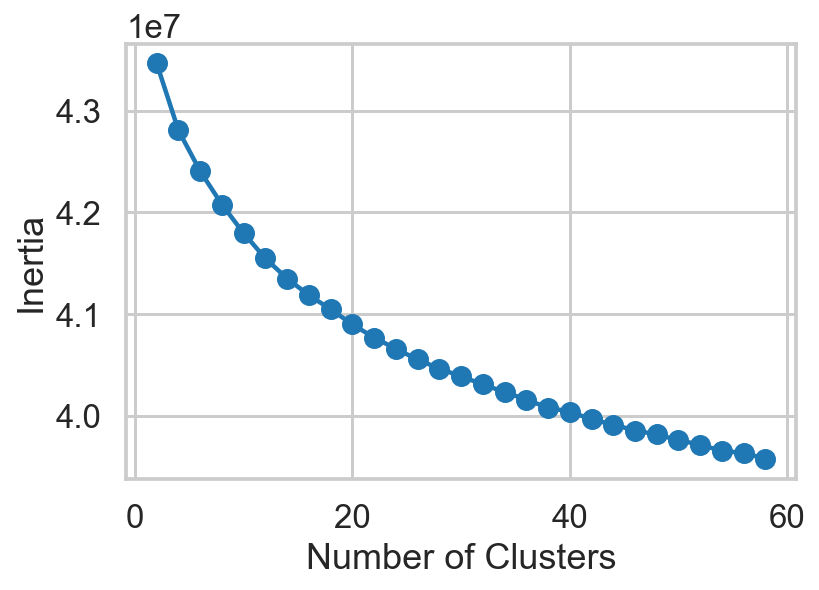

In [422]:
plt.plot(range(2,60,2),    inertia_t)
plt.scatter(range(2,60,2), inertia_t)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');

In [ ]:
def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 10))

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(np.int)])
#     plt.xlim(-25, 25)
#     plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

In [ ]:
import os

base_path = "/Users/kate/Downloads/"
filename = "twitter_words.txt"
path_to_file = os.path.join(base_path, filename)
fd = open(path_to_file , 'r')

In [14]:
twitter_set = set(line.strip() for line in open('/Users/kate/Downloads/twitter_words.txt'))

twitter_set

{'info-graphic',
 'fast-track',
 'polly',
 'redistributing',
 'shuttleworth',
 'washcloths',
 'rooftopprince',
 'watchyourself',
 'reassure',
 'hateu',
 'smalltownprobs',
 'expecttheunexpected',
 'beated',
 'spottheshuttle',
 'stephani',
 'shoestring',
 'buticant',
 'truthbomb',
 'childhood',
 'youknowyouregermanwhen',
 'infotweet',
 'nthomas',
 'motherfuckin',
 'catherina',
 'schoolproblems',
 'magconfamily',
 'topoftheleague',
 'twifi',
 'exactly',
 'ticketed',
 'spitgametoarandomfollower',
 'photography',
 'toney',
 'showcase',
 'whol',
 'conversing',
 'crashin',
 'suckish',
 'nced',
 'ntry',
 'instaration',
 'bluntly',
 'sexfacts',
 'ifollowbackjp',
 'tomorrow!nn',
 'clutch',
 "she'on",
 'copperhead',
 'cysticfibrosis',
 'irritations',
 'yourname',
 'snowboarding',
 'searing',
 'infertility',
 'onlinecasino',
 'harty',
 'thingsiwillteachmychild',
 'southee',
 'andrewchristian',
 'perth',
 'neededthat',
 'alwaysmylove',
 'beyondscaredstraight',
 'inflatable',
 'soybean',
 'backtothe

In [15]:
wikipedia_set = set(words)
wikipedia_set

{'ishall',
 '2371',
 'polly',
 'sludges',
 'corruptors',
 'reprises',
 'rectangle',
 '2095',
 'redistributing',
 'tangen',
 'chandavarkar',
 'paul-émile',
 'himelfarb',
 'flat-bed',
 'reemerging',
 'namam',
 'muesli',
 'beames',
 'bufotenin',
 'kippax',
 'rebuilder',
 'msomi',
 'shabaan',
 'transgaz',
 'blackall',
 'sphingolipid',
 'pickler',
 'shoestring',
 'non-aviation',
 'ny456',
 'linnean',
 'rothen',
 'piledriver',
 'gaal',
 'elana',
 'mrk',
 'eim',
 'subsumption',
 'ahus',
 'langsner',
 'astiz',
 'soccerway',
 'isis',
 'tolerable',
 'bicyclic',
 'circuit-switched',
 'arabic',
 'dukinfield',
 'aldbourne',
 'khazal',
 'toul',
 'kochav',
 'nunchucks',
 'ruach',
 'ironical',
 'hovered',
 'regulatory',
 '194,000',
 'tornante',
 'azo',
 '2,558',
 'yasuhara',
 'demming',
 'skeppsbron',
 'chaunac',
 'stams',
 'travertine',
 'silvestro',
 'samawi',
 'acree',
 'talx',
 '12.78',
 '8.40',
 'mid-week',
 'georgian',
 'tomasini',
 'regenerated',
 '70.54',
 'descalzos',
 'draganja',
 'digirolam

In [16]:
common_words = twitter_set & wikipedia_set 
print(len(common_words))
list(common_words)

14424


['sparrow',
 'fast-track',
 'blithe',
 'polly',
 'throwin',
 'sainthood',
 'affirming',
 'infancy',
 'creamy',
 'redistributing',
 'fof',
 'inflated',
 'horace',
 'indoctrinated',
 'shuttleworth',
 'propensity',
 'action',
 'washcloths',
 'chaser',
 'hat-tricks',
 'reassure',
 'humbled',
 'student-athlete',
 'nothern',
 'trotman',
 'cool',
 'imports',
 'hypervisor',
 'reasons',
 's.t',
 'release',
 'educators',
 'whirled',
 'stephani',
 'clawing',
 'transformational',
 'ashbury',
 'shoestring',
 'scrunching',
 'boothe',
 'astonishing',
 'childhood',
 'wrestlemania',
 'white-hot',
 'chamberlin',
 'super-hero',
 'turney',
 'displays',
 'cowgirl',
 'exfoliated',
 'hedonism',
 'photographs',
 'business',
 'heaved',
 'catherina',
 'infront',
 'back-to-back',
 'habour',
 'beachfront',
 'horribly',
 'thankfulness',
 'interaction',
 'bifurcation',
 'headstrong',
 'beamish',
 'heartening',
 'scunthorpe',
 'exactly',
 'ticketed',
 'outerwear',
 'pervious',
 'photography',
 'chandi',
 'toney',
 '

In [31]:
with open('common_words.txt', 'w') as f:
    for item in common_words:
        f.write("%s\n" % item)

In [17]:
wiki_indices = []
twitter_indices = []
for word in tqdm(common_words):
    wiki_indices.append(model_wikipedia200.key_to_index[word])
    twitter_indices.append(model_twitter200.key_to_index[word])
wiki_indices

100%|█████████████████████████████████| 14424/14424 [00:00<00:00, 234853.15it/s]


[24911,
 135613,
 69719,
 23622,
 351690,
 35978,
 28323,
 20777,
 23175,
 75956,
 278703,
 14213,
 17613,
 71104,
 54254,
 31103,
 608,
 226521,
 41727,
 106874,
 12182,
 26997,
 116547,
 125421,
 60177,
 3451,
 3097,
 134998,
 1997,
 315468,
 713,
 13002,
 74386,
 174912,
 49953,
 52360,
 81248,
 46280,
 228174,
 80265,
 14764,
 4662,
 40486,
 314432,
 50355,
 153964,
 61443,
 7048,
 59992,
 396021,
 65064,
 4619,
 258,
 53699,
 157035,
 175720,
 30773,
 267870,
 30556,
 31088,
 151345,
 8774,
 82434,
 52075,
 94595,
 43860,
 37279,
 2796,
 50209,
 75491,
 147830,
 6801,
 96336,
 40735,
 229201,
 1111,
 9290,
 13244,
 2245,
 65129,
 22952,
 60808,
 10624,
 25533,
 21178,
 61538,
 122748,
 294974,
 78297,
 21424,
 19644,
 32936,
 259246,
 40966,
 41738,
 72804,
 14899,
 191420,
 253386,
 8444,
 35980,
 4076,
 82617,
 1601,
 18837,
 87388,
 121803,
 85573,
 221035,
 24764,
 58097,
 213,
 31721,
 23909,
 31229,
 53447,
 23403,
 23476,
 10337,
 5271,
 150512,
 29427,
 40603,
 124364,
 73

In [18]:
wiki_vecs = []
twitter_vecs = []
for i in wiki_indices:
    wiki_vecs.append(model_wikipedia200[i])
    
for j in twitter_indices:
    twitter_vecs.append(model_twitter200[j])

len(twitter_vecs)

14424

In [19]:
wiki_vecs

[array([-1.2708e-01, -5.0103e-01,  5.1391e-02, -2.0712e-01,  6.8537e-01,
        -2.0333e-01,  1.3800e-01,  1.0537e+00,  2.7558e-01,  2.1447e-01,
         3.4752e-01, -9.9081e-02,  1.0998e-01, -2.9426e-01, -4.6057e-02,
         1.2578e-01,  1.5470e-01, -1.0429e-01, -3.9655e-02,  1.6904e-01,
         1.9020e-01, -1.5502e-01,  1.4597e-01,  3.9255e-01,  1.6379e-01,
        -3.1376e-01,  3.6114e-01, -4.0684e-01, -5.5506e-01,  7.8562e-01,
         1.6245e-01,  4.9303e-01,  9.3712e-02,  1.0325e-01,  3.1386e-01,
        -1.8798e-01, -5.4044e-01,  3.4276e-01, -3.5539e-01, -3.0414e-01,
        -8.6285e-01,  1.1939e-01, -6.7325e-02,  2.8631e-01, -5.8088e-01,
         5.9009e-01, -1.0710e-01, -7.1996e-02,  5.0357e-01,  5.0962e-01,
         7.0293e-01, -5.4691e-01, -9.9208e-02,  2.2256e-01, -2.0558e-01,
         6.7295e-02, -3.3710e-01,  8.3238e-01, -6.7344e-01,  8.3108e-01,
         1.0704e+00, -4.7329e-02,  2.2764e-03,  5.7287e-02, -5.7682e-01,
        -5.9505e-01, -1.1212e-01, -4.7794e-01,  4.2

In [22]:
X = wiki_vecs
X = np.array(X)

In [112]:
model_wikipedia200.vectors

array([[-0.071549 ,  0.093459 ,  0.023738 , ...,  0.33617  ,  0.030591 ,
         0.25577  ],
       [ 0.17651  ,  0.29208  , -0.0020768, ..., -0.20774  , -0.23189  ,
        -0.10814  ],
       [ 0.12289  ,  0.58037  , -0.069635 , ..., -0.039174 , -0.16236  ,
        -0.096652 ],
       ...,
       [ 0.17932  , -0.22     ,  0.080188 , ..., -0.26854  , -0.51297  ,
        -0.40487  ],
       [-0.44607  ,  0.025024 ,  0.10755  , ..., -0.19955  , -0.17528  ,
        -0.31097  ],
       [-0.51113  , -0.47518  ,  0.22871  , ..., -0.0057218,  0.16466  ,
        -0.39074  ]], dtype=float32)

In [20]:
def plot_X_and_proj(X, X_proj):
    '''
    Plot data matrix X against its projection onto principal components
    '''
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
    fig.tight_layout()

    ax[0].scatter(X[:,0], X[:,1], c='b')
    ax[0].set_title('Original Data X')
    
    ax[1].scatter(X_proj[:,0], X_proj[:,1], c='r')
    ax[1].set_title('X Projected Onto Principal Components')

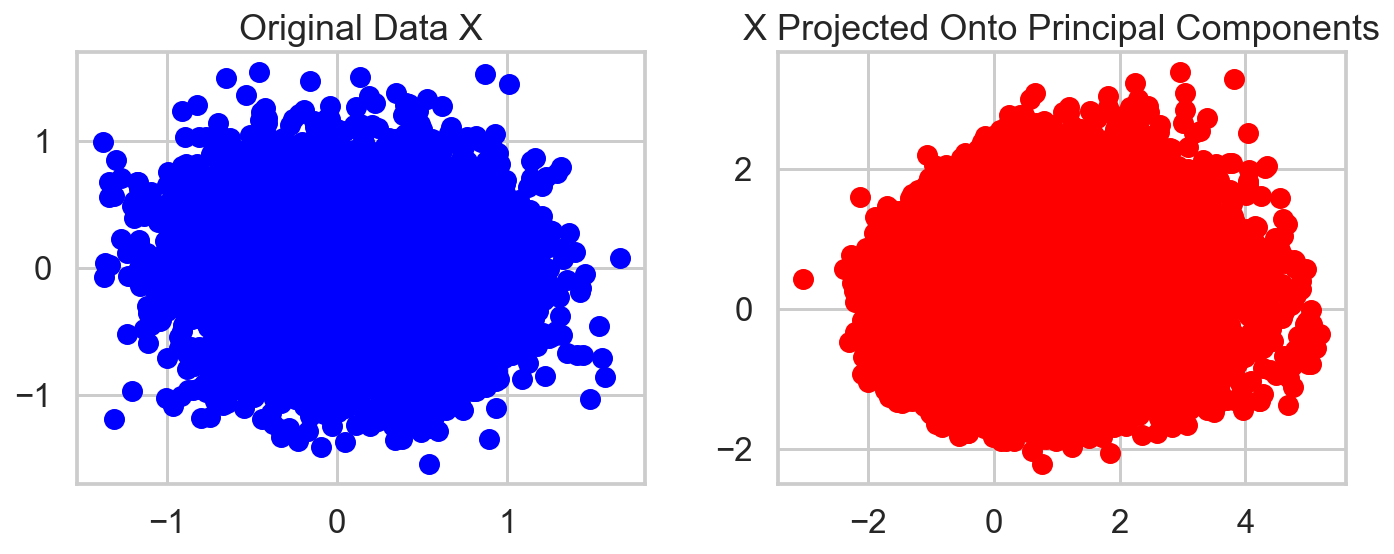

In [23]:
from sklearn.decomposition import PCA
X = np.array(wiki_vecs)
pca = PCA(100)
X_proj = pca.fit_transform(X)
plot_X_and_proj(X, X_proj)

In [24]:
def show_variance_explained_plots(pca):
    
    var_exp_array = pca.explained_variance_ratio_
    n_comps = var_exp_array.shape[0] 
    
    fig, ax = plt.subplots(1,2,figsize=(10,4))
    
    ax[0].fill_between(range(n_comps), var_exp_array)
    ax[0].set_title('Variance Explained by Nth Principal Component')
    
    ax[1].fill_between(range(n_comps), np.cumsum(var_exp_array))
    ax[1].set_title('Cumulative Variance Explained by N Components')
    
    plt.show()

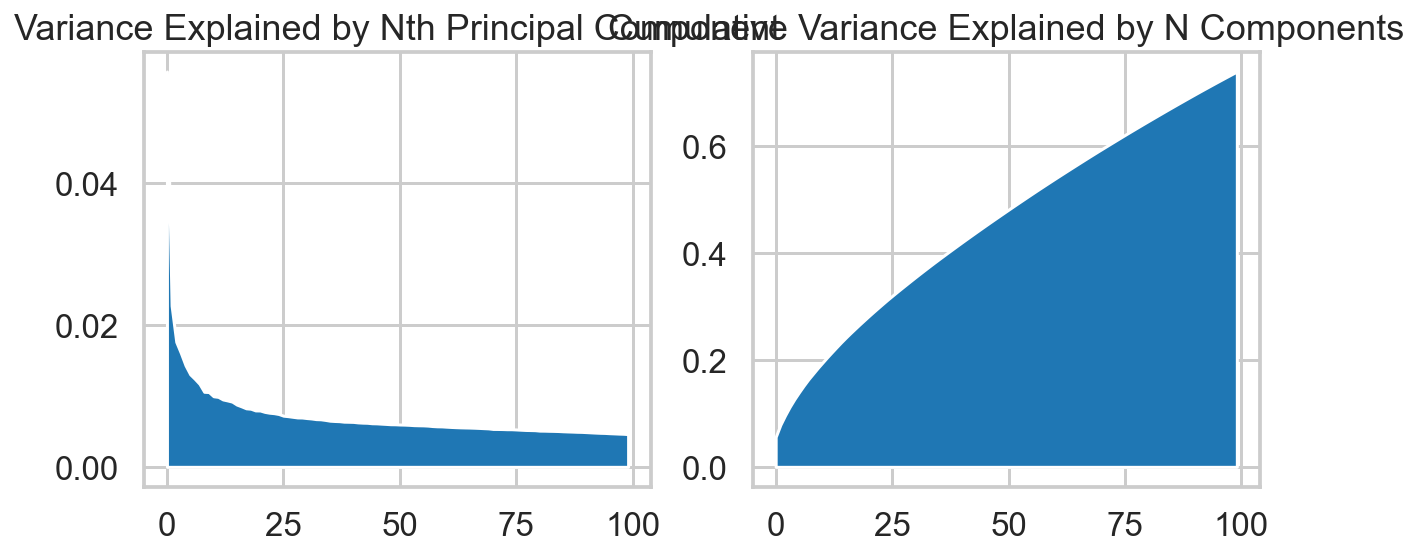

In [25]:
show_variance_explained_plots(pca)

In [57]:

# Standardize our data for DBSCAN and fit DBSCAN
X_proj = StandardScaler().fit_transform(X_proj)
db = DBSCAN(eps=.3, min_samples=3, metric='cosine').fit(X_proj)

# Let's find the observations DBSCAN called "core"
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels_w = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels_w)) - (1 if -1 in labels_w else 0)
n_clusters_

232

In [28]:
n_clusters_

68

2022-03-10 16:44:54,081 : WARNING : *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
2022-03-10 16:44:54,084 : WARNING : *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
2022-03-10 16:44:54,088 : WARNING : *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you in

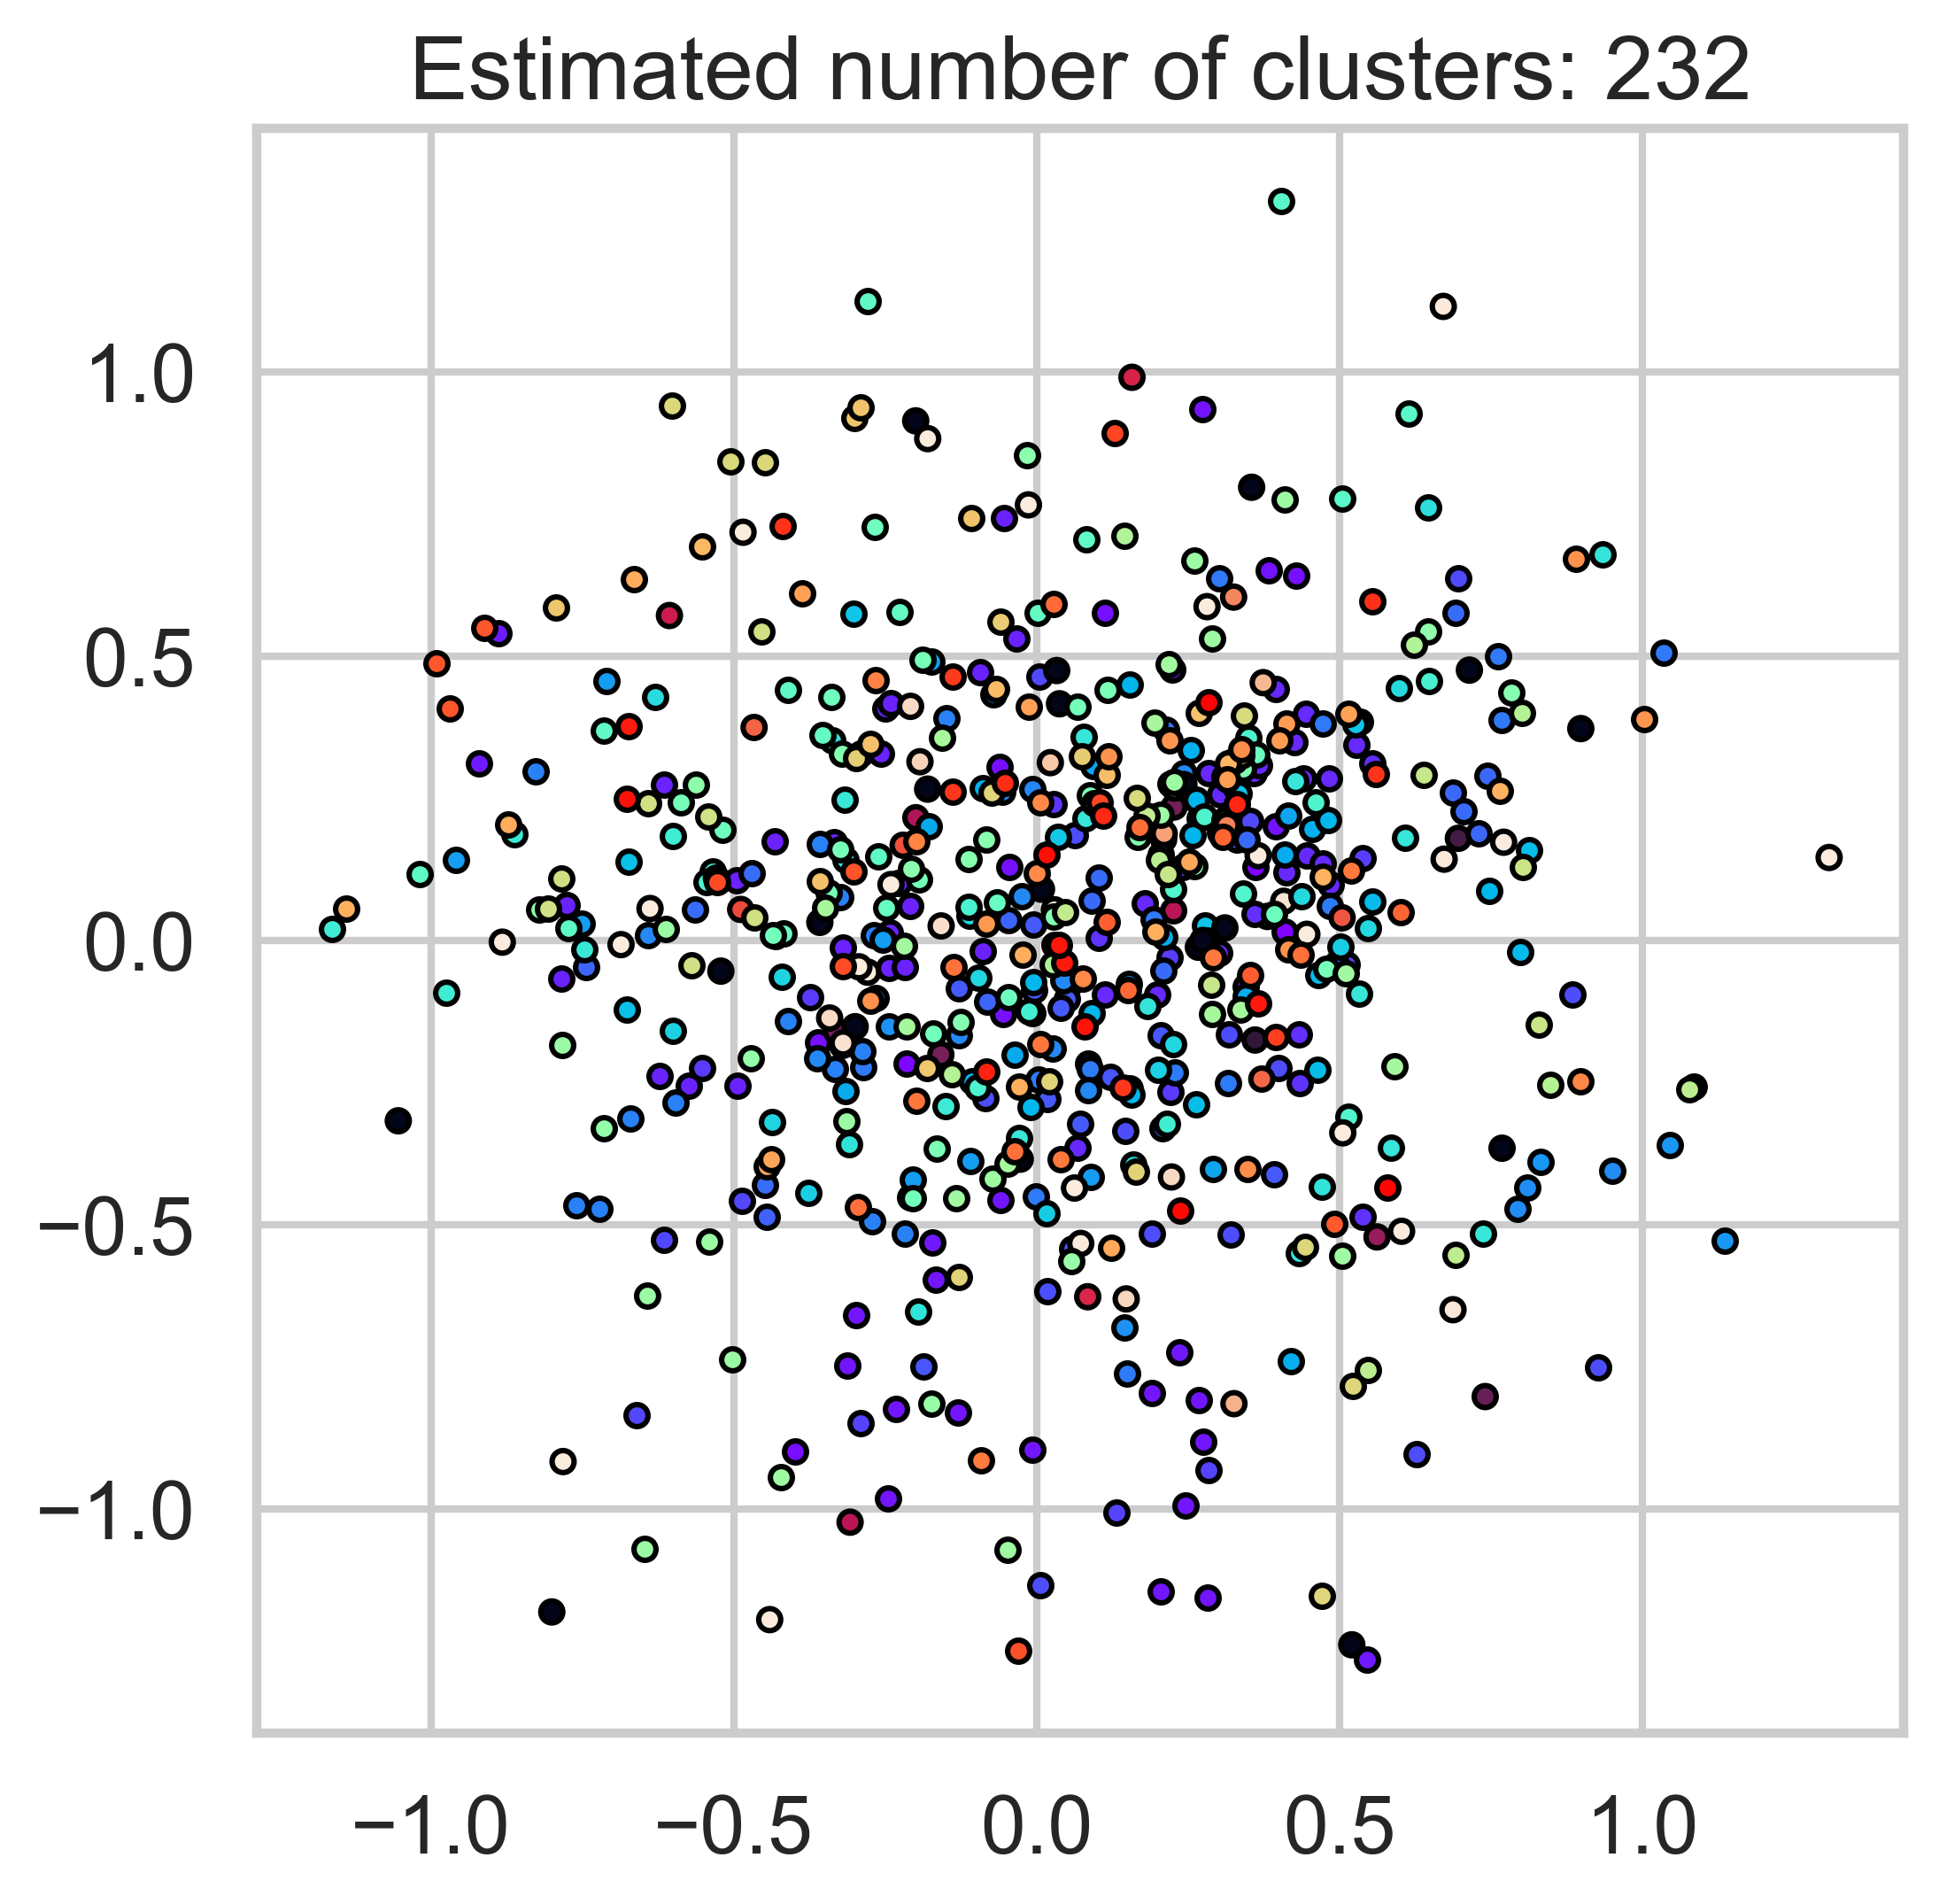

In [58]:
unique_labels = set(labels_w)
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))
plt.figure(dpi=200)
show_core = True
show_non_core = False
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels_w == k)
    if show_core:
        xy = X[class_member_mask & core_samples_mask]
        x, y = xy[:,0], xy[:,1]
        plt.scatter(x, y, c=col, edgecolors='k',  s=20, linewidths=1.1) # add black border for core points
    
    if show_non_core:
        xy = X[class_member_mask & ~core_samples_mask]
        x, y = xy[:,0], xy[:,1]
        plt.scatter(x, y, c=col, s=20, linewidths=1.1)

plt.title('Estimated number of clusters: %d' % n_clusters_);



16

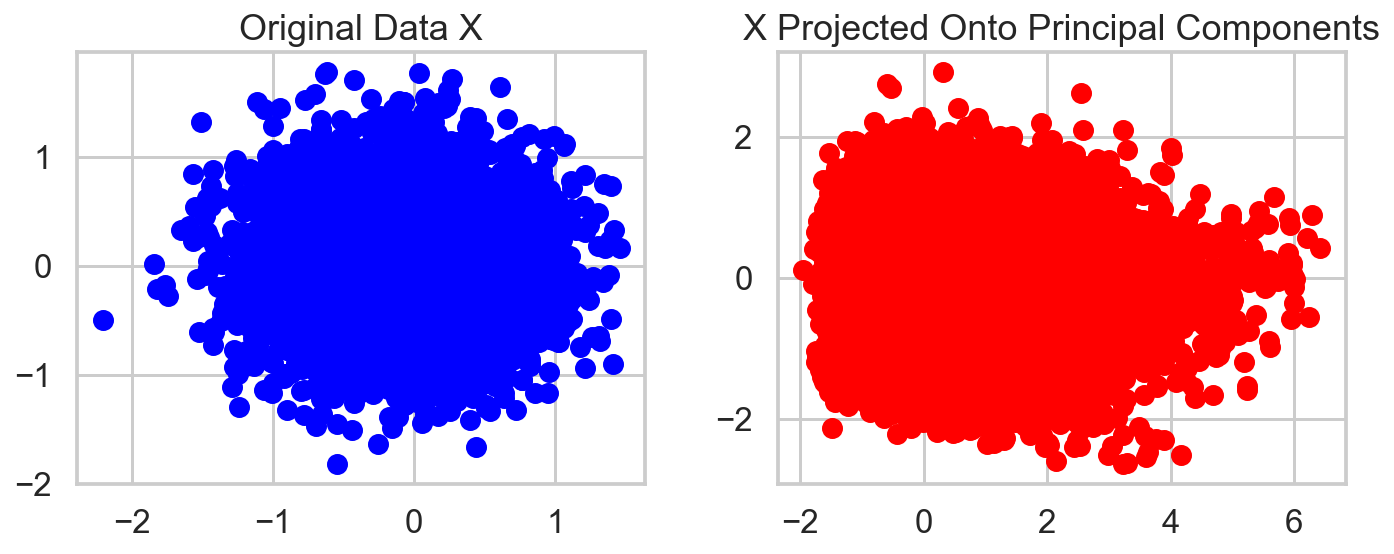

In [81]:
#twitter
Y = twitter_vecs
Y = np.array(Y)

pca = PCA(125)
Y_proj = pca.fit_transform(Y)
plot_X_and_proj(Y, Y_proj)

# Standardize our data for DBSCAN and fit DBSCAN
Y_proj = StandardScaler().fit_transform(Y_proj)
db = DBSCAN(eps=.6, min_samples=7, metric='cosine').fit(Y_proj)

# Let's find the observations DBSCAN called "core"
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

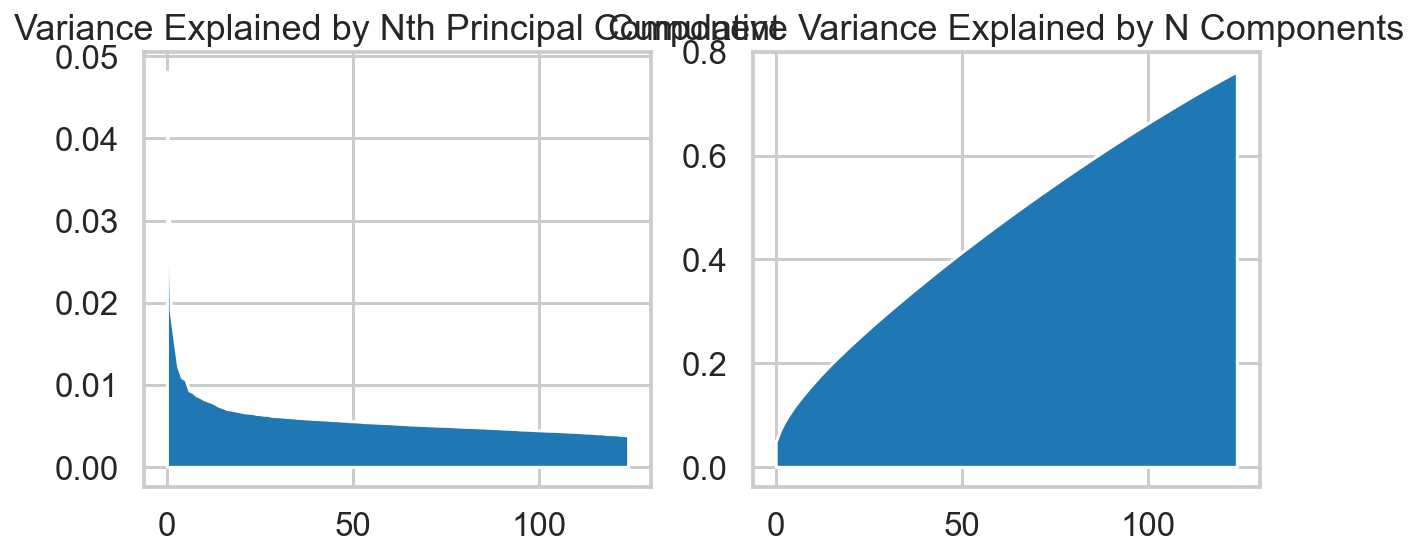

In [63]:
show_variance_explained_plots(pca)

2022-03-10 16:50:53,983 : WARNING : *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
2022-03-10 16:50:53,987 : WARNING : *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
2022-03-10 16:50:53,993 : WARNING : *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you in

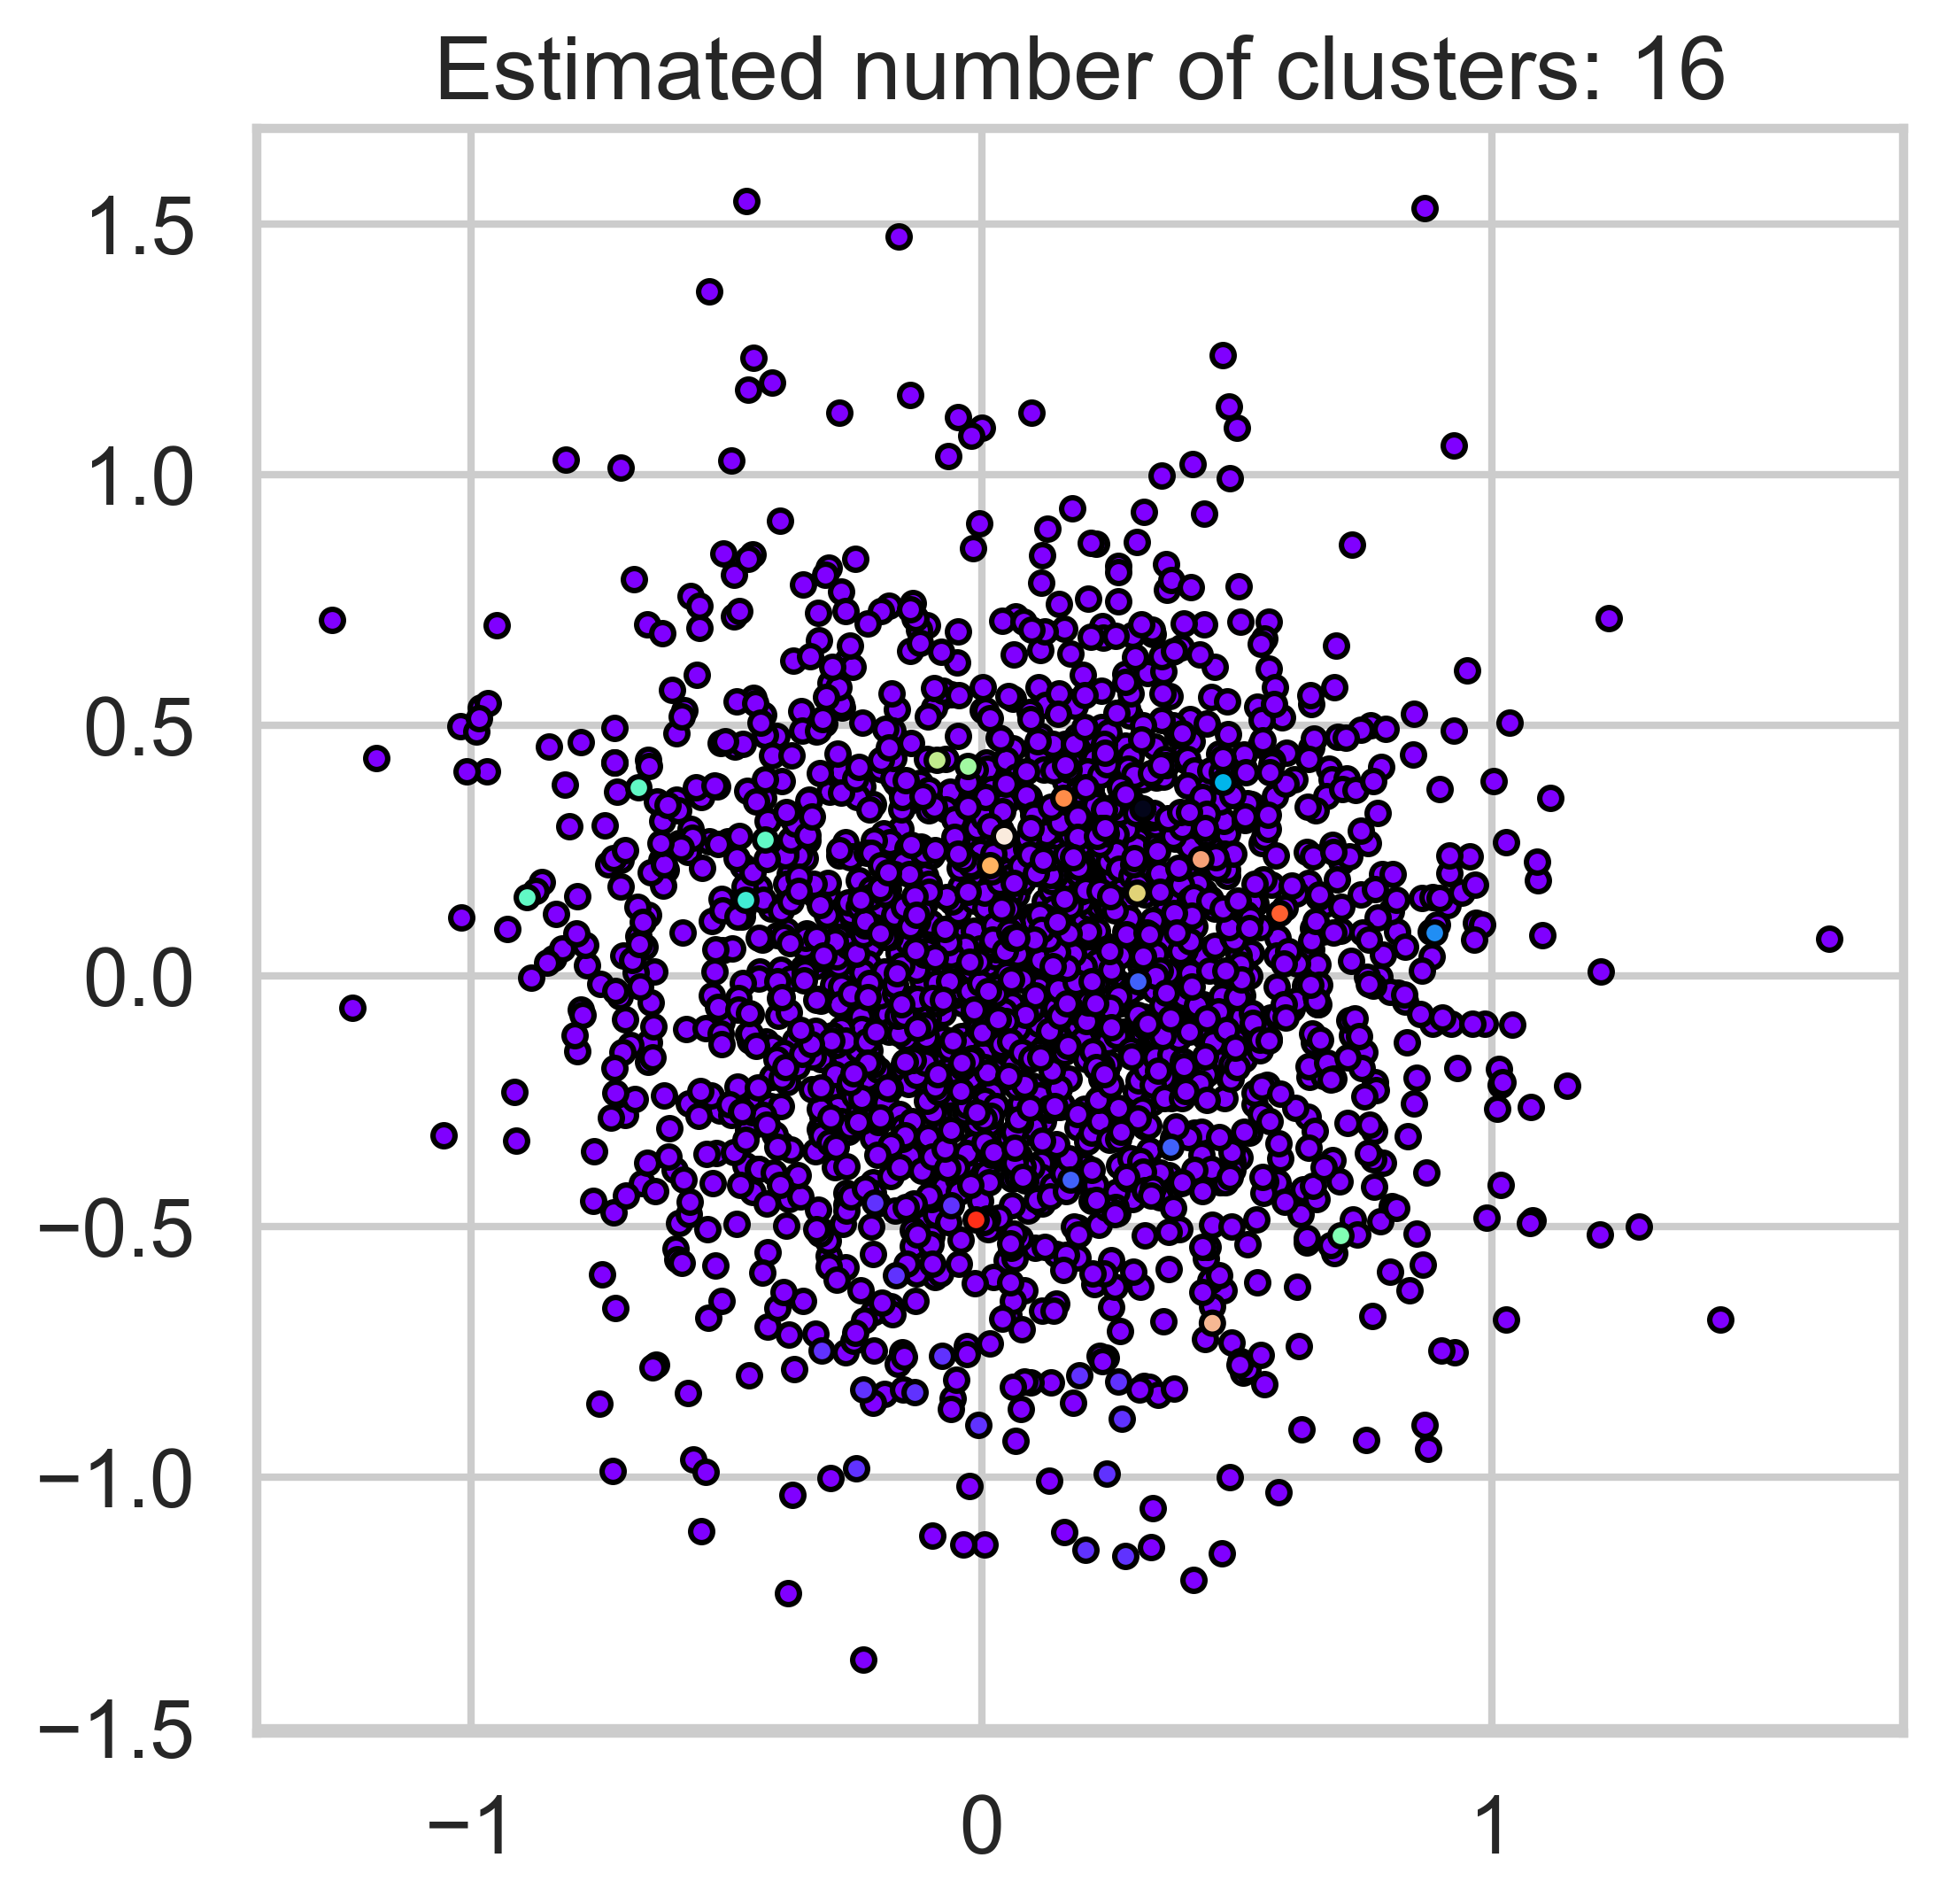

In [82]:
unique_labels = set(labels)
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))
plt.figure(dpi=200)
show_core = True
show_non_core = False
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)
    if show_core:
        xy = X[class_member_mask & core_samples_mask]
        x, y = xy[:,0], xy[:,1]
        plt.scatter(x, y, c=col, edgecolors='k',  s=20, linewidths=1.1) # add black border for core points
    
    if show_non_core:
        xy = X[class_member_mask & ~core_samples_mask]
        x, y = xy[:,0], xy[:,1]
        plt.scatter(x, y, c=col, s=20, linewidths=1.1)

plt.title('Estimated number of clusters: %d' % n_clusters_);


In [68]:
from sklearn import metrics
print("Twitter Silhouette Coefficient: %0.3f" % metrics.silhouette_score(Y, labels))

print("Wikipedia Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels_w))

Twitter Silhouette Coefficient: -0.087
Wikipedia Silhouette Coefficient: -0.143


In [69]:
db.core_sample_indices_

array([    4,     8,    16, ..., 14419, 14420, 14422])

In [352]:
len(Y_proj[0])

125

In [70]:
len(db.components_)

3176

In [72]:
set(db.labels_)

{-1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24}

In [73]:
cluster = []
for i in list(db.labels_):
    if list(db.labels_)[i] == -1.0:
        pass
    else:
        cluster.append(list(db.labels_)[i])
#         print(db.labels_[i])
    
word_column = []
for i in db.core_sample_indices_:
    word_column.append(list(common_words)[i])
    


In [74]:
set(cluster)

{0}

In [314]:
all_clusters = []
for i in list(db.labels_):
    all_clusters.append(db.labels_[i])
len(all_clusters)

14424

In [347]:
df_twitter = pd.DataFrame({
    "text": list(common_words),
    "cluster": all_clusters
})
df_twitter.sort_values('cluster')


text  cluster
7211   time-honored       -1
8979        thrusts       -1
8980   battleground       -1
8981        appeals       -1
8982         covets       -1
...             ...      ...
8089   overcrowding        0
4874       hartpury        0
11369    westbourne        0
8096     insightful        0
0        derbyshire        0

[14424 rows x 2 columns]

In [84]:
X_proj

array([[ 0.251583  ,  1.5694673 , -0.9218532 , ...,  1.2691039 ,
        -0.33514538,  0.6316924 ],
       [-0.78120005, -0.23993434,  2.1349828 , ..., -0.56680745,
         0.5195737 ,  2.7905426 ],
       [-0.6490364 , -0.6455242 , -1.0859137 , ..., -0.24699228,
         0.11694941, -1.6088549 ],
       ...,
       [-0.6862872 , -0.7815785 , -0.78477675, ...,  2.3064713 ,
        -0.959742  , -0.3504178 ],
       [ 1.0619785 ,  0.30675465, -2.2502055 , ...,  0.7378335 ,
        -0.15758173, -1.1887504 ],
       [-0.5404347 , -1.523164  ,  1.6123098 , ..., -1.1349871 ,
         0.62761575, -0.29600424]], dtype=float32)

In [83]:
Y_proj

array([[ 0.90734   , -1.2820934 , -0.4495931 , ...,  0.69386905,
         0.382252  , -0.34964317],
       [-0.6841849 ,  0.12636402,  1.5061326 , ..., -0.35472766,
         1.4769604 , -0.2049836 ],
       [-0.9144318 , -0.4808259 , -0.23074627, ..., -0.3129702 ,
        -0.555424  ,  0.63466144],
       ...,
       [-0.6366259 ,  0.28234   , -0.32262838, ...,  0.3188401 ,
        -0.96094054, -1.0662261 ],
       [ 0.7951055 ,  1.3585719 , -1.8554972 , ...,  0.36467785,
         1.1645412 , -1.6404178 ],
       [-1.0164262 ,  0.62114877,  1.4832035 , ...,  1.6574469 ,
         0.5581895 ,  1.9482514 ]], dtype=float32)

IndexError: string index out of range

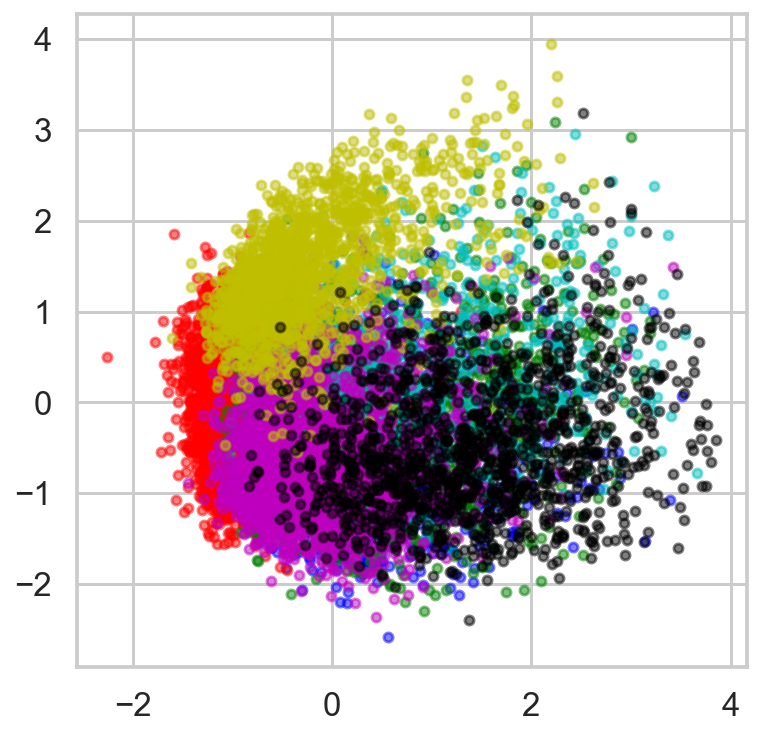

In [85]:
num_clusters = 10
km = KMeans(n_clusters=num_clusters,random_state=10,n_init=1) # n_init, number of times the K-mean algorithm will run
km.fit(X_proj)
display_cluster(X_proj,km,num_clusters)